In [42]:
import keras

# Ensure to set the image data format appropriately
K = keras.backend.backend()
current_format = keras.backend.image_data_format()
print("Current Image Data Format:", current_format)

if K == 'tensorflow':
    keras.backend.set_image_data_format('channels_last')
else:
    keras.backend.set_image_data_format('channels_first')

Current Image Data Format: channels_last


In [43]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(2017)

from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.utils import to_categorical, model_to_dot
from keras.preprocessing import sequence
from keras.datasets import mnist
from keras import backend as K
from IPython.display import SVG, display
from keras.utils import plot_model, model_to_dot

In [44]:
img_rows, img_cols = 28, 28
nb_classes = 10

nb_filters = 5 # the number of filters
nb_pool = 2 # window size of pooling
nb_conv = 3 # window or kernel size of filter
nb_epoch = 5

# Set the image data format
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [45]:
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [46]:
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Convolution2D(nb_filters, nb_conv, nb_conv, input_shape=input_shape),
    Activation('relu'),
    Convolution2D(nb_filters, nb_conv, nb_conv),
    Activation('relu'),
    MaxPooling2D(pool_size=(nb_pool, nb_pool)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

In [47]:
# create complete model
model = Sequential(feature_layers + classification_layers)

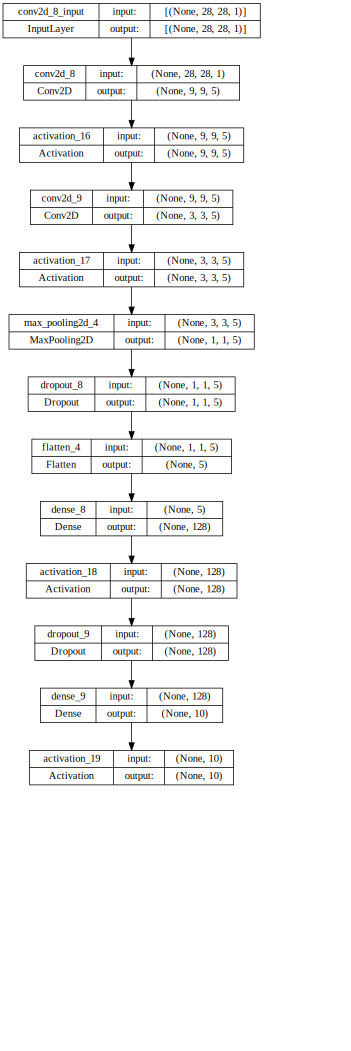

In [48]:
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [49]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 9, 9, 5)           50        
                                                                 
 activation_16 (Activation)  (None, 9, 9, 5)           0         
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 3, 5)           230       
                                                                 
 activation_17 (Activation)  (None, 3, 3, 5)           0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 1, 1, 5)           0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 1, 1, 5)           0         
                                                      

In [50]:
model.fit(X_train, Y_train, epochs=nb_epoch, batch_size=256, verbose=2,  validation_split=0.2)

Epoch 1/5
188/188 - 1s - loss: 2.3078 - accuracy: 0.0998 - val_loss: 2.3055 - val_accuracy: 0.1168 - 1s/epoch - 7ms/step
Epoch 2/5
188/188 - 1s - loss: 2.3073 - accuracy: 0.1009 - val_loss: 2.3052 - val_accuracy: 0.1173 - 923ms/epoch - 5ms/step
Epoch 3/5
188/188 - 1s - loss: 2.3075 - accuracy: 0.0999 - val_loss: 2.3050 - val_accuracy: 0.1180 - 907ms/epoch - 5ms/step
Epoch 4/5
188/188 - 1s - loss: 2.3072 - accuracy: 0.0994 - val_loss: 2.3047 - val_accuracy: 0.1187 - 866ms/epoch - 5ms/step
Epoch 5/5
188/188 - 1s - loss: 2.3066 - accuracy: 0.1005 - val_loss: 2.3045 - val_accuracy: 0.1193 - 735ms/epoch - 4ms/step


**Visualization of layers**

In [57]:
# visualization
def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data, cmap=plt.cm.gray_r)
    plt.axis('off')

**Input layer (original image)**

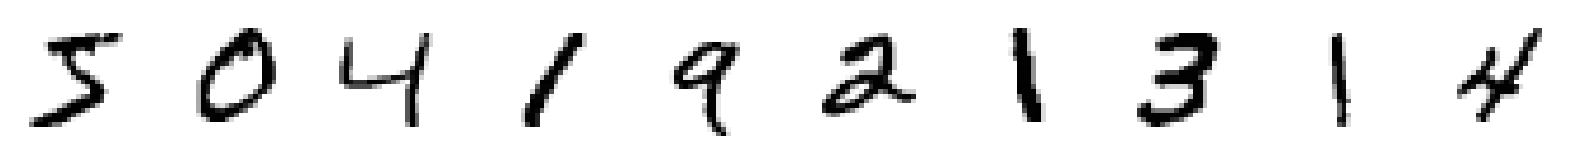

In [58]:
show_size = 10
plt.figure(figsize=(20,20))

for i in range(show_size):
    draw(X_train[i].reshape(28,28), 1, show_size, i+1)
plt.show()

***First layer with 5 filters***

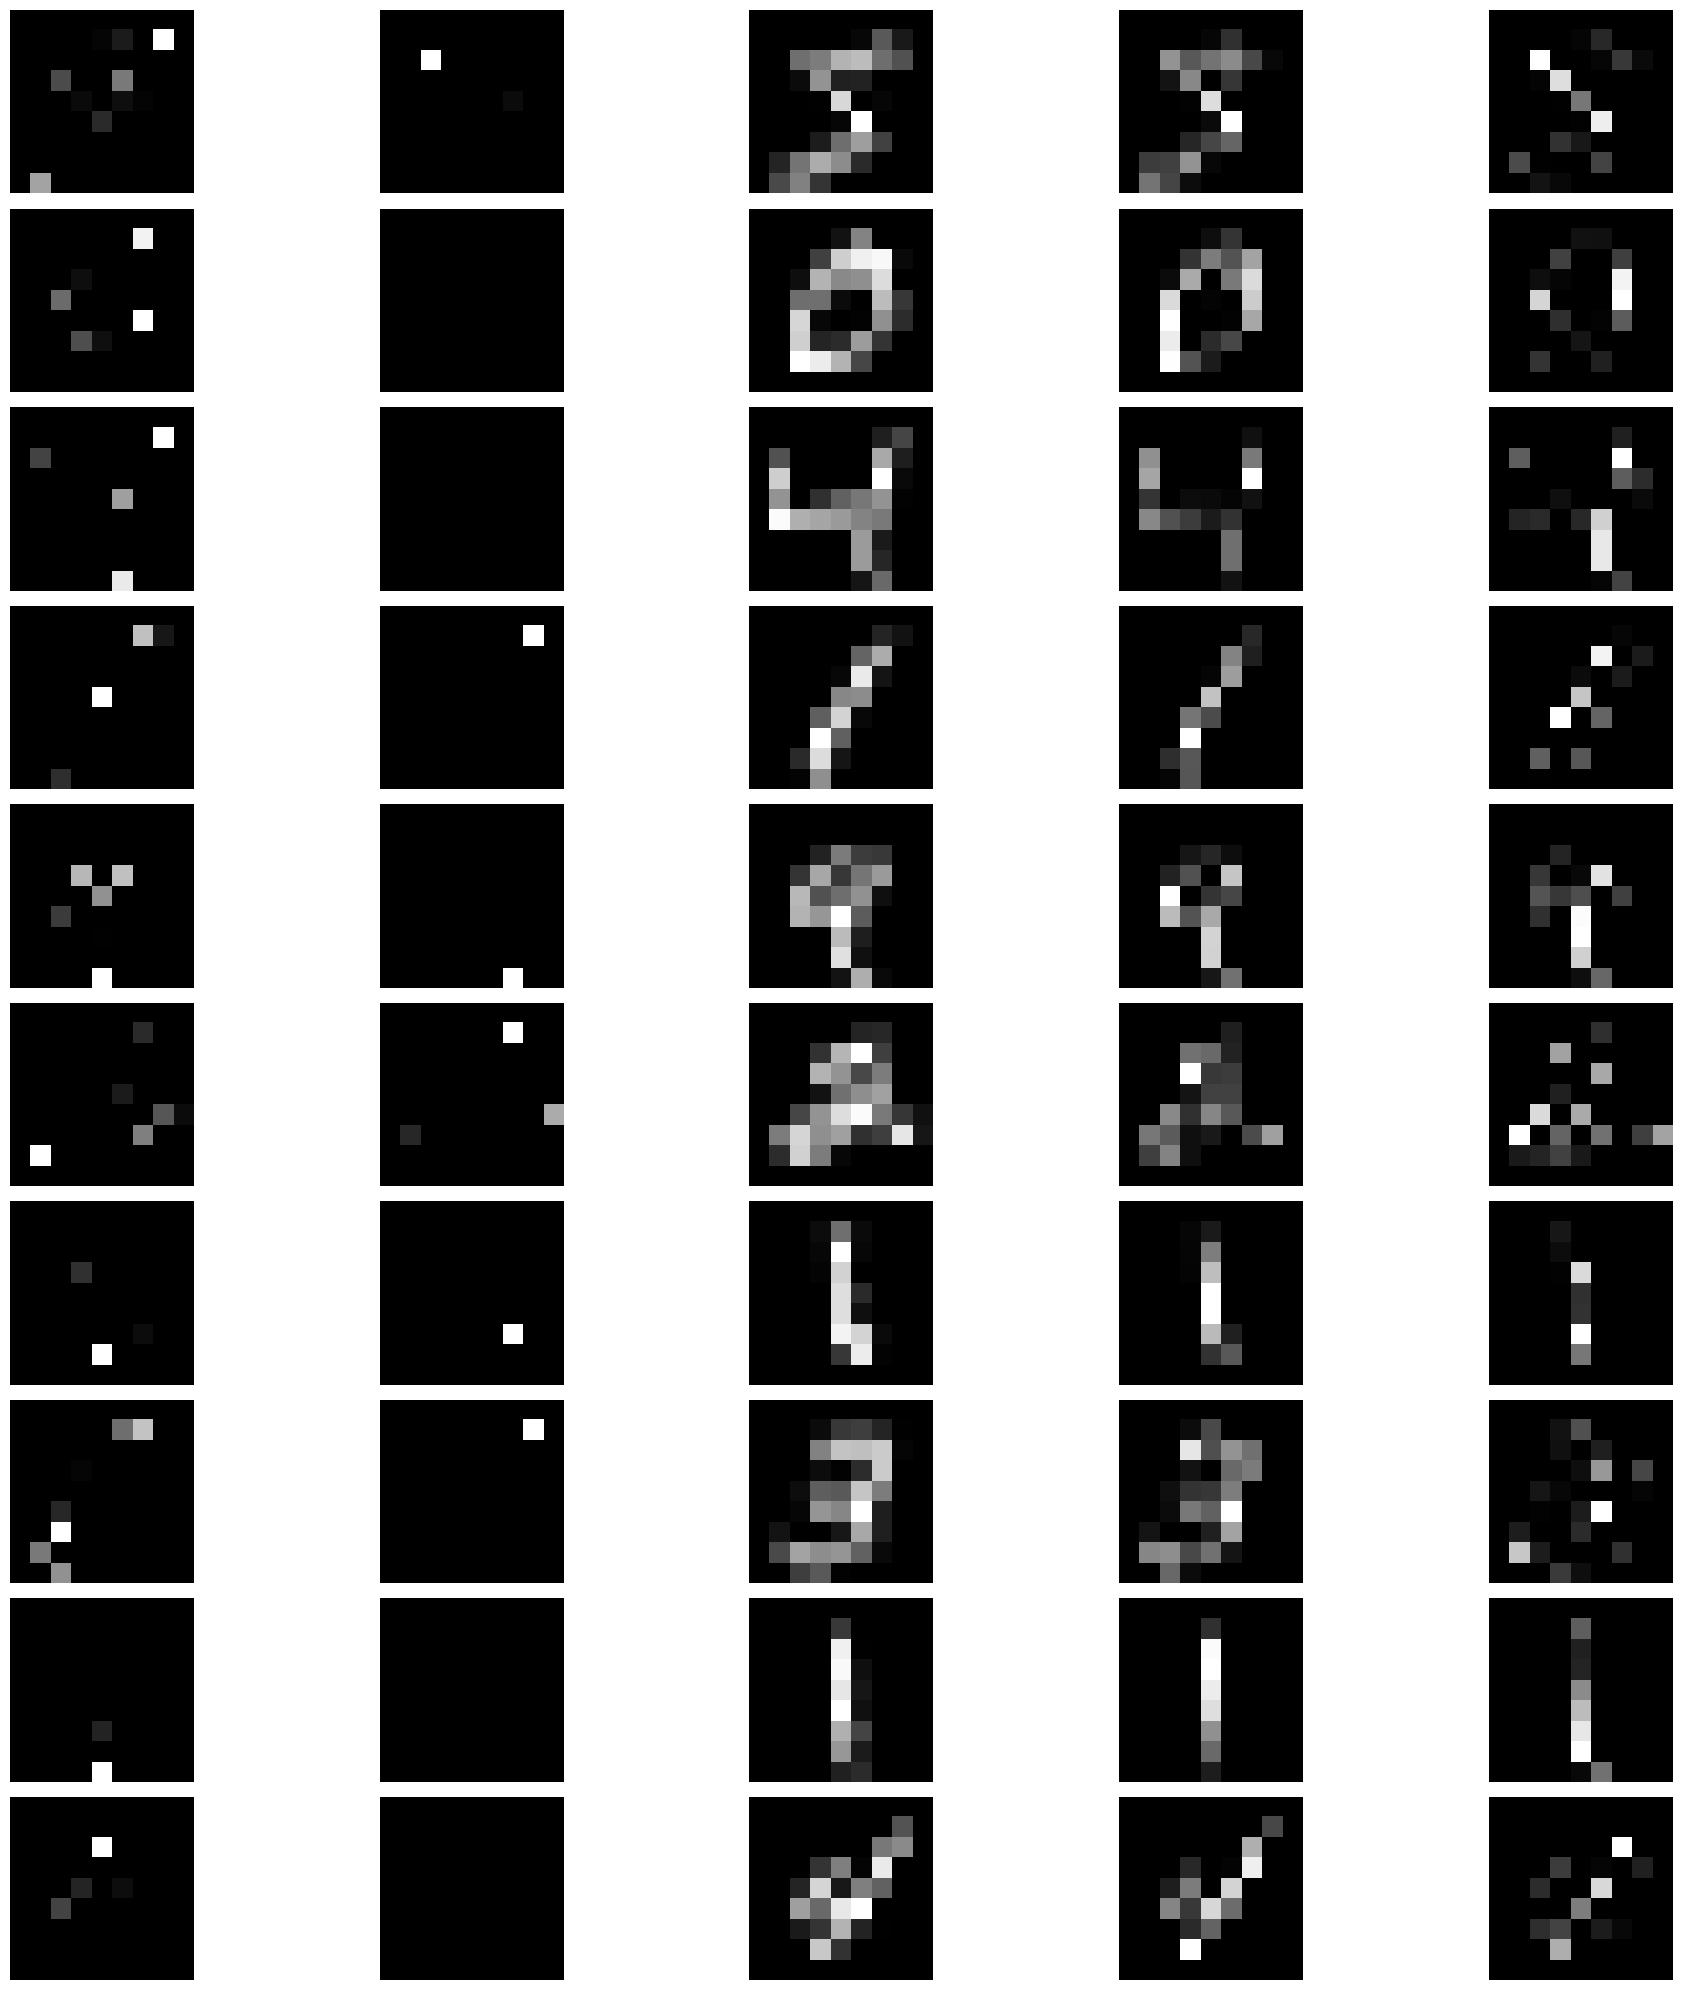

In [60]:
plt.figure(figsize=(20, 20))

# Loop through each image
for img_index in range(show_size):
    # Loop through each filter
    for filter_index in range(nb_filters):
        # Calculate the position of the subplot
        pos = img_index * nb_filters + filter_index + 1  # '+1' because subplot indexing starts at 1

        plt.subplot(show_size, nb_filters, pos)
        plt.imshow(first_layer[img_index, :, :, filter_index], cmap='gray')
        plt.axis('off')

plt.tight_layout()
plt.show()

***Second layer with 5 filters***

second layer shape:  (10, 3, 3, 5)


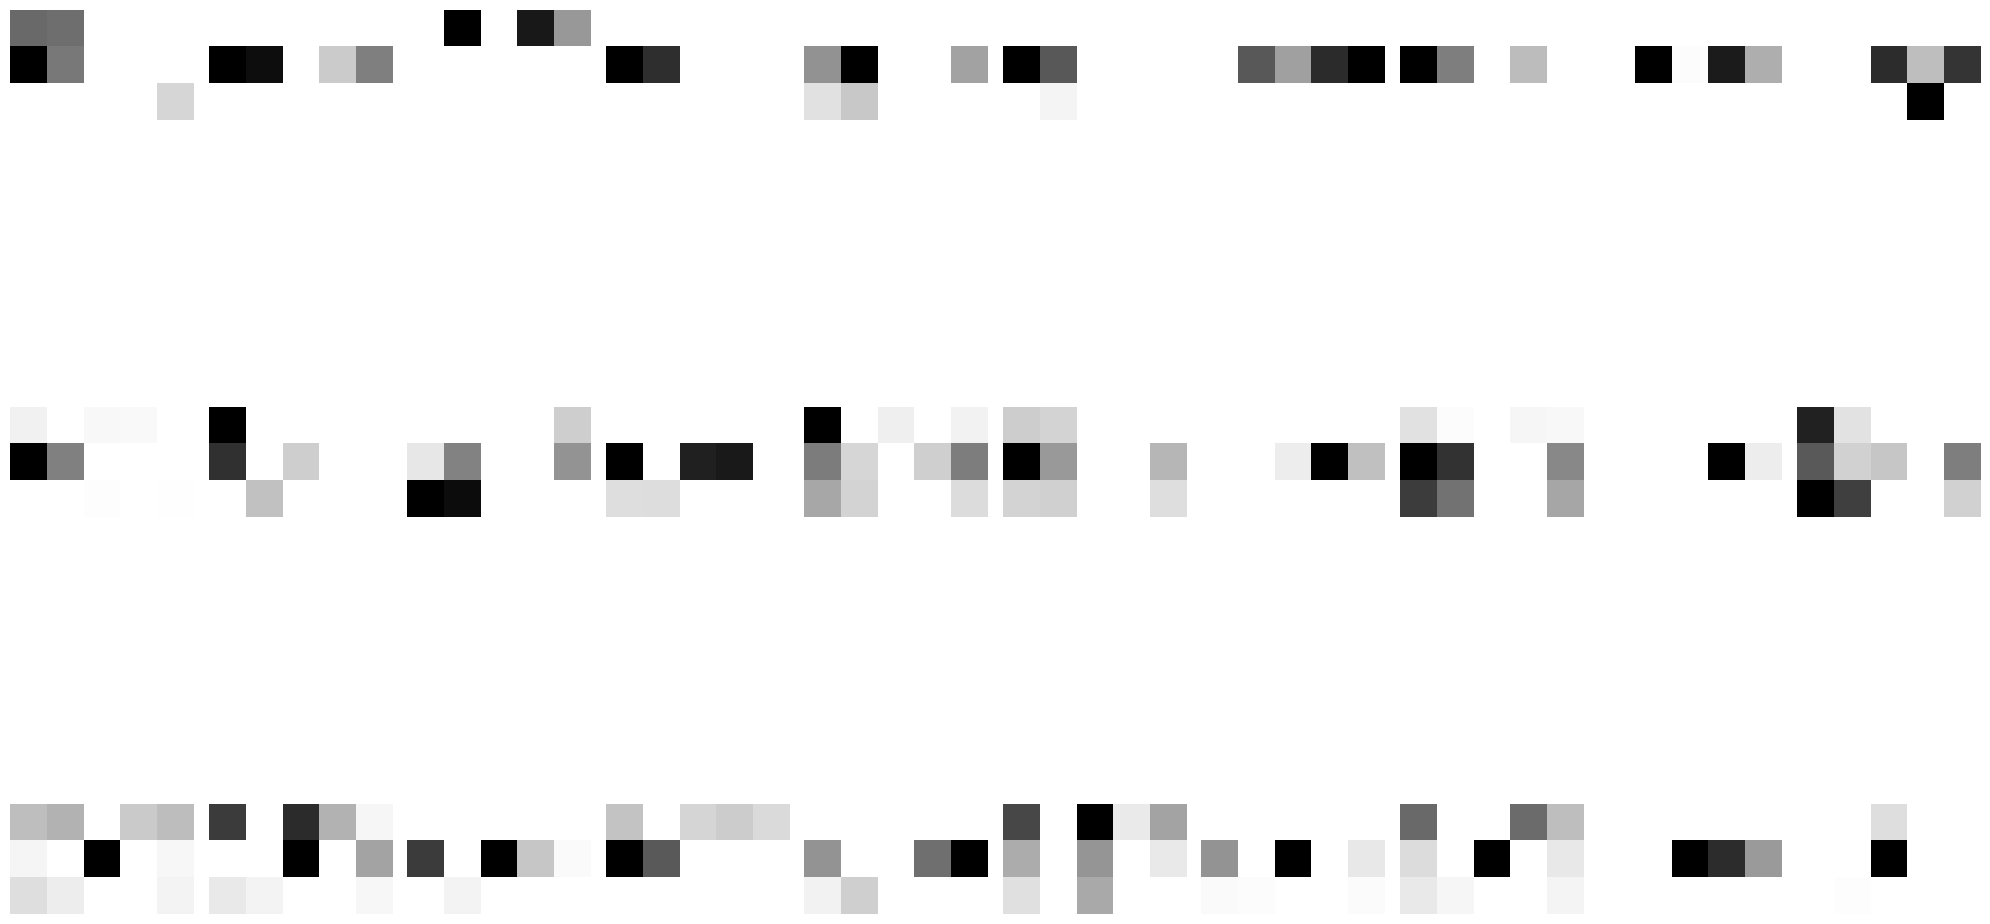

In [61]:
get_second_layer_output = K.function([model.layers[0].input], [model.layers[3].output])
second_layer = get_second_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))
print ('second layer shape: ', second_layer.shape)

for img_index, filters in enumerate(second_layer, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw(mat, nb_filters, show_size, pos)
plt.tight_layout()        
plt.show()

**Third layer with 5 filters**

thrid layer shape:  (10, 1, 1, 5)


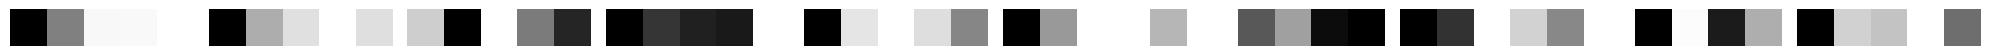

In [63]:
get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[4].output])
third_layers = get_3rd_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))
print ('thrid layer shape: ', third_layers.shape)

for img_index, filters in enumerate(third_layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10+img_index
        draw(mat, nb_filters, show_size, pos)
plt.tight_layout()
plt.show()